#### Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning (Regular Expression)
import re
import string

# Data Preprocessing (tokenizing, stopword, stemming)
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Data Visualization (Word Cloud)
from wordcloud import WordCloud

# Model Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Evaluation Model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Show Data Diagram 

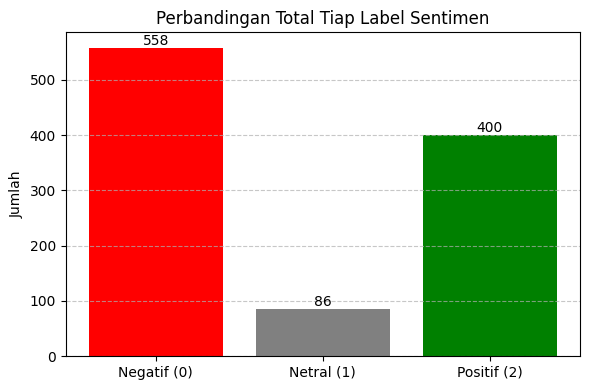

In [2]:
# Load the dataset from the Excel file
file_path_strava = 'scrapped_data_strava.xlsx' 
data1 = pd.read_excel(file_path_strava)

file_path_adidas = 'scrapped_data_adidas.xlsx' 
data2 = pd.read_excel(file_path_adidas)

file_path_nike = 'scrapped_data_nike.xlsx' 
data3 = pd.read_excel(file_path_nike)

# Merge the datasets
data = pd.concat([data1[['content', 'Label']], data2[['content', 'Label']], data3[['content', 'Label']]], ignore_index=True)

# Count the occurrences of each label
label_counts = data['Label'].value_counts().sort_index()

# Create a bar plot for the label counts
plt.figure(figsize=(6, 4))
bars = plt.bar(label_counts.index, label_counts.values, color=['red', 'gray', 'green'])
plt.xticks([0, 1, 2], ['Negatif (0)', 'Netral (1)', 'Positif (2)'])
plt.ylabel('Jumlah')
plt.title('Perbandingan Total Tiap Label Sentimen')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

#### Save Merge Data

In [3]:
data_filtered = data[(data['Label'] != 1) & (data['Label'].notna())]

data_filtered.to_excel("result_filtered.xlsx", index=False)

#### Undersampling Negative Data

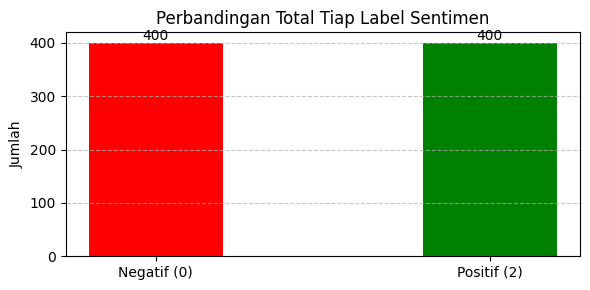

In [4]:
# Load the dataset from the Excel file
data = pd.read_excel("result_filtered.xlsx")

negatif_data = data[data['Label'] == 0]
positif_data = data[data['Label'] == 2]

# Sampling data negatif 
negatif_sampled = negatif_data.sample(n=400, random_state=42)
data_balanced = pd.concat([negatif_sampled, positif_data], ignore_index=True)
label_counts = data_balanced['Label'].value_counts().sort_index()

# Membuat plot
plt.figure(figsize=(6, 3))
bars = plt.bar(label_counts.index, label_counts.values, color=['red', 'green'])
plt.xticks([0, 2], ['Negatif (0)', 'Positif (2)']) 
plt.ylabel('Jumlah')
plt.title('Perbandingan Total Tiap Label Sentimen')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Tampilkan plot
plt.tight_layout()
plt.show()

#### Preprocessing

##### Cleaning Data

In [5]:
# Define a function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove not alphabet 
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove emoji (Unicode characters in a specific range)
    text = re.sub(r'[^\w\s,]', '', text, flags=re.UNICODE)
    return text

data['clean_data'] = data['content']

data['clean_data'] = data['clean_data'].apply(clean_text)
data.head(10)

,content,Label,clean_data
0,Aplikasi yang membantu untuk merekam aktivitas...,2,aplikasi yang membantu untuk merekam aktivitas...
1,"Overall udah bagus bgt fiturnya, bisa dibawa l...",0,overall udah bagus bgt fiturnya bisa dibawa la...
2,"Gak sengaja nutup app ini, pas mau dibuka ulan...",0,gak sengaja nutup app ini pas mau dibuka ulang...
3,"Aplikasinya sangat bagus, sangat recommended b...",2,aplikasinya sangat bagus sangat recommended ba...
4,Ride Auto-Pause tidak berfungsi sesuai yg diha...,0,ride autopause tidak berfungsi sesuai yg dihar...
5,fitur menghapus aktifitas sebelum disave sanga...,0,fitur menghapus aktifitas sebelum disave sanga...
6,"Segera di Perbarui untuk peletakan tools, masa...",0,segera di perbarui untuk peletakan tools masak...
7,akun strava saya kok gak bisa login ya? pake a...,0,akun strava saya kok gak bisa login ya pake ak...
8,saya akhirnya menemukan hobi baru yaitu lari y...,2,saya akhirnya menemukan hobi baru yaitu lari y...
9,kenapa sekrang selalu bug ya? saya menggunakan...,0,kenapa sekrang selalu bug ya saya menggunakan ...


##### Words Tokenizing

In [6]:
data['tokenized_data'] = data['clean_data']

data['tokenized_data'] = data['tokenized_data'].apply(lambda x: word_tokenize(x))
data.head(10)

,content,Label,clean_data,tokenized_data
0,Aplikasi yang membantu untuk merekam aktivitas...,2,aplikasi yang membantu untuk merekam aktivitas...,"[aplikasi, yang, membantu, untuk, merekam, akt..."
1,"Overall udah bagus bgt fiturnya, bisa dibawa l...",0,overall udah bagus bgt fiturnya bisa dibawa la...,"[overall, udah, bagus, bgt, fiturnya, bisa, di..."
2,"Gak sengaja nutup app ini, pas mau dibuka ulan...",0,gak sengaja nutup app ini pas mau dibuka ulang...,"[gak, sengaja, nutup, app, ini, pas, mau, dibu..."
3,"Aplikasinya sangat bagus, sangat recommended b...",2,aplikasinya sangat bagus sangat recommended ba...,"[aplikasinya, sangat, bagus, sangat, recommend..."
4,Ride Auto-Pause tidak berfungsi sesuai yg diha...,0,ride autopause tidak berfungsi sesuai yg dihar...,"[ride, autopause, tidak, berfungsi, sesuai, yg..."
5,fitur menghapus aktifitas sebelum disave sanga...,0,fitur menghapus aktifitas sebelum disave sanga...,"[fitur, menghapus, aktifitas, sebelum, disave,..."
6,"Segera di Perbarui untuk peletakan tools, masa...",0,segera di perbarui untuk peletakan tools masak...,"[segera, di, perbarui, untuk, peletakan, tools..."
7,akun strava saya kok gak bisa login ya? pake a...,0,akun strava saya kok gak bisa login ya pake ak...,"[akun, strava, saya, kok, gak, bisa, login, ya..."
8,saya akhirnya menemukan hobi baru yaitu lari y...,2,saya akhirnya menemukan hobi baru yaitu lari y...,"[saya, akhirnya, menemukan, hobi, baru, yaitu,..."
9,kenapa sekrang selalu bug ya? saya menggunakan...,0,kenapa sekrang selalu bug ya saya menggunakan ...,"[kenapa, sekrang, selalu, bug, ya, saya, mengg..."


##### Normalisasi

In [7]:
# Membaca kamus normalisasi dari file teks
def load_slang_dictionary(file_path):
    slang_dict = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            slang, baku = line.strip().split(':', 1)
            slang_dict[slang] = baku
    return slang_dict

# Memuat kamus slang
file_path = "slangword.txt"
kata_normalisasi_dict = load_slang_dictionary(file_path)

# Fungsi untuk normalisasi kata
def normalisasi_kata(document):
    return [kata_normalisasi_dict[term] if term in kata_normalisasi_dict else term for term in document]

data['normalized_data'] = data['tokenized_data'].apply(normalisasi_kata)

data.head(10)

,content,Label,clean_data,tokenized_data,normalized_data
0,Aplikasi yang membantu untuk merekam aktivitas...,2,aplikasi yang membantu untuk merekam aktivitas...,"[aplikasi, yang, membantu, untuk, merekam, akt...","[aplikasi, yang, membantu, untuk, merekam, akt..."
1,"Overall udah bagus bgt fiturnya, bisa dibawa l...",0,overall udah bagus bgt fiturnya bisa dibawa la...,"[overall, udah, bagus, bgt, fiturnya, bisa, di...","[overall, sudah, bagus, banget, fiturnya, bisa..."
2,"Gak sengaja nutup app ini, pas mau dibuka ulan...",0,gak sengaja nutup app ini pas mau dibuka ulang...,"[gak, sengaja, nutup, app, ini, pas, mau, dibu...","[tidak, sengaja, nutup, aplikasi, ini, pas, ma..."
3,"Aplikasinya sangat bagus, sangat recommended b...",2,aplikasinya sangat bagus sangat recommended ba...,"[aplikasinya, sangat, bagus, sangat, recommend...","[aplikasinya, sangat, bagus, sangat, recommend..."
4,Ride Auto-Pause tidak berfungsi sesuai yg diha...,0,ride autopause tidak berfungsi sesuai yg dihar...,"[ride, autopause, tidak, berfungsi, sesuai, yg...","[ride, autopause, tidak, berfungsi, sesuai, ya..."
5,fitur menghapus aktifitas sebelum disave sanga...,0,fitur menghapus aktifitas sebelum disave sanga...,"[fitur, menghapus, aktifitas, sebelum, disave,...","[fitur, menghapus, aktifitas, sebelum, disave,..."
6,"Segera di Perbarui untuk peletakan tools, masa...",0,segera di perbarui untuk peletakan tools masak...,"[segera, di, perbarui, untuk, peletakan, tools...","[segera, di, perbarui, untuk, peletakan, tools..."
7,akun strava saya kok gak bisa login ya? pake a...,0,akun strava saya kok gak bisa login ya pake ak...,"[akun, strava, saya, kok, gak, bisa, login, ya...","[akun, strava, saya, kok, tidak, bisa, login, ..."
8,saya akhirnya menemukan hobi baru yaitu lari y...,2,saya akhirnya menemukan hobi baru yaitu lari y...,"[saya, akhirnya, menemukan, hobi, baru, yaitu,...","[saya, akhirnya, menemukan, hobi, baru, yaitu,..."
9,kenapa sekrang selalu bug ya? saya menggunakan...,0,kenapa sekrang selalu bug ya saya menggunakan ...,"[kenapa, sekrang, selalu, bug, ya, saya, mengg...","[kenapa, sekrang, selalu, bug, ya, saya, mengg..."


##### Stopwords Removal

In [8]:
# Daftar stopwords Bahasa Indonesia
stop = set(stopwords.words('indonesian'))
stop = stop.union({"nya"})

# Fungsi untuk menghapus stopwords dari list token
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop]

data['stopword_removal'] = data['normalized_data'].apply(remove_stopwords)

data.head(10)

,content,Label,clean_data,tokenized_data,normalized_data,stopword_removal
0,Aplikasi yang membantu untuk merekam aktivitas...,2,aplikasi yang membantu untuk merekam aktivitas...,"[aplikasi, yang, membantu, untuk, merekam, akt...","[aplikasi, yang, membantu, untuk, merekam, akt...","[aplikasi, membantu, merekam, aktivitas, jalan..."
1,"Overall udah bagus bgt fiturnya, bisa dibawa l...",0,overall udah bagus bgt fiturnya bisa dibawa la...,"[overall, udah, bagus, bgt, fiturnya, bisa, di...","[overall, sudah, bagus, banget, fiturnya, bisa...","[overall, bagus, banget, fiturnya, dibawa, lat..."
2,"Gak sengaja nutup app ini, pas mau dibuka ulan...",0,gak sengaja nutup app ini pas mau dibuka ulang...,"[gak, sengaja, nutup, app, ini, pas, mau, dibu...","[tidak, sengaja, nutup, aplikasi, ini, pas, ma...","[sengaja, nutup, aplikasi, pas, dibuka, ulang,..."
3,"Aplikasinya sangat bagus, sangat recommended b...",2,aplikasinya sangat bagus sangat recommended ba...,"[aplikasinya, sangat, bagus, sangat, recommend...","[aplikasinya, sangat, bagus, sangat, recommend...","[aplikasinya, bagus, recommended, banget, pemu..."
4,Ride Auto-Pause tidak berfungsi sesuai yg diha...,0,ride autopause tidak berfungsi sesuai yg dihar...,"[ride, autopause, tidak, berfungsi, sesuai, yg...","[ride, autopause, tidak, berfungsi, sesuai, ya...","[ride, autopause, berfungsi, sesuai, diharapka..."
5,fitur menghapus aktifitas sebelum disave sanga...,0,fitur menghapus aktifitas sebelum disave sanga...,"[fitur, menghapus, aktifitas, sebelum, disave,...","[fitur, menghapus, aktifitas, sebelum, disave,...","[fitur, menghapus, aktifitas, disave, berguna,..."
6,"Segera di Perbarui untuk peletakan tools, masa...",0,segera di perbarui untuk peletakan tools masak...,"[segera, di, perbarui, untuk, peletakan, tools...","[segera, di, perbarui, untuk, peletakan, tools...","[perbarui, peletakan, tools, masak, tombol, ca..."
7,akun strava saya kok gak bisa login ya? pake a...,0,akun strava saya kok gak bisa login ya pake ak...,"[akun, strava, saya, kok, gak, bisa, login, ya...","[akun, strava, saya, kok, tidak, bisa, login, ...","[akun, strava, login, ya, pakai, akun, apapun,..."
8,saya akhirnya menemukan hobi baru yaitu lari y...,2,saya akhirnya menemukan hobi baru yaitu lari y...,"[saya, akhirnya, menemukan, hobi, baru, yaitu,...","[saya, akhirnya, menemukan, hobi, baru, yaitu,...","[menemukan, hobi, lari, lari, suka, menganggap..."
9,kenapa sekrang selalu bug ya? saya menggunakan...,0,kenapa sekrang selalu bug ya saya menggunakan ...,"[kenapa, sekrang, selalu, bug, ya, saya, mengg...","[kenapa, sekrang, selalu, bug, ya, saya, mengg...","[sekrang, bug, ya, pace, sekitaran, aplikasi, ..."


##### Stemming

In [9]:
# Fungsi stemming untuk list token
def stemming_tokens(tokens):
    factory_stemmer = StemmerFactory()
    stemmer = factory_stemmer.create_stemmer()
    return [stemmer.stem(token) for token in tokens]

data['stemmed_data'] = data['stopword_removal'].apply(stemming_tokens)

data.head(10)

,content,Label,clean_data,tokenized_data,normalized_data,stopword_removal,stemmed_data
0,Aplikasi yang membantu untuk merekam aktivitas...,2,aplikasi yang membantu untuk merekam aktivitas...,"[aplikasi, yang, membantu, untuk, merekam, akt...","[aplikasi, yang, membantu, untuk, merekam, akt...","[aplikasi, membantu, merekam, aktivitas, jalan...","[aplikasi, bantu, rekam, aktivitas, jalan, kak..."
1,"Overall udah bagus bgt fiturnya, bisa dibawa l...",0,overall udah bagus bgt fiturnya bisa dibawa la...,"[overall, udah, bagus, bgt, fiturnya, bisa, di...","[overall, sudah, bagus, banget, fiturnya, bisa...","[overall, bagus, banget, fiturnya, dibawa, lat...","[overall, bagus, banget, fiturnya, bawa, latih..."
2,"Gak sengaja nutup app ini, pas mau dibuka ulan...",0,gak sengaja nutup app ini pas mau dibuka ulang...,"[gak, sengaja, nutup, app, ini, pas, mau, dibu...","[tidak, sengaja, nutup, aplikasi, ini, pas, ma...","[sengaja, nutup, aplikasi, pas, dibuka, ulang,...","[sengaja, nutup, aplikasi, pas, buka, ulang, c..."
3,"Aplikasinya sangat bagus, sangat recommended b...",2,aplikasinya sangat bagus sangat recommended ba...,"[aplikasinya, sangat, bagus, sangat, recommend...","[aplikasinya, sangat, bagus, sangat, recommend...","[aplikasinya, bagus, recommended, banget, pemu...","[aplikasi, bagus, recommended, banget, pemulap..."
4,Ride Auto-Pause tidak berfungsi sesuai yg diha...,0,ride autopause tidak berfungsi sesuai yg dihar...,"[ride, autopause, tidak, berfungsi, sesuai, yg...","[ride, autopause, tidak, berfungsi, sesuai, ya...","[ride, autopause, berfungsi, sesuai, diharapka...","[ride, autopause, fungsi, sesuai, harap, timer..."
5,fitur menghapus aktifitas sebelum disave sanga...,0,fitur menghapus aktifitas sebelum disave sanga...,"[fitur, menghapus, aktifitas, sebelum, disave,...","[fitur, menghapus, aktifitas, sebelum, disave,...","[fitur, menghapus, aktifitas, disave, berguna,...","[fitur, hapus, aktifitas, disave, guna, langsu..."
6,"Segera di Perbarui untuk peletakan tools, masa...",0,segera di perbarui untuk peletakan tools masak...,"[segera, di, perbarui, untuk, peletakan, tools...","[segera, di, perbarui, untuk, peletakan, tools...","[perbarui, peletakan, tools, masak, tombol, ca...","[baru, leta, tools, masak, tombol, card, gede,..."
7,akun strava saya kok gak bisa login ya? pake a...,0,akun strava saya kok gak bisa login ya pake ak...,"[akun, strava, saya, kok, gak, bisa, login, ya...","[akun, strava, saya, kok, tidak, bisa, login, ...","[akun, strava, login, ya, pakai, akun, apapun,...","[akun, strava, login, ya, pakai, akun, apa, lo..."
8,saya akhirnya menemukan hobi baru yaitu lari y...,2,saya akhirnya menemukan hobi baru yaitu lari y...,"[saya, akhirnya, menemukan, hobi, baru, yaitu,...","[saya, akhirnya, menemukan, hobi, baru, yaitu,...","[menemukan, hobi, lari, lari, suka, menganggap...","[temu, hobi, lari, lari, suka, anggap, lari, m..."
9,kenapa sekrang selalu bug ya? saya menggunakan...,0,kenapa sekrang selalu bug ya saya menggunakan ...,"[kenapa, sekrang, selalu, bug, ya, saya, mengg...","[kenapa, sekrang, selalu, bug, ya, saya, mengg...","[sekrang, bug, ya, pace, sekitaran, aplikasi, ...","[sekrang, bug, ya, pace, sekitar, aplikasi, ta..."


In [10]:
data.to_excel("data_cleaning.xlsx", index = False)  

#### Show WorldCloud

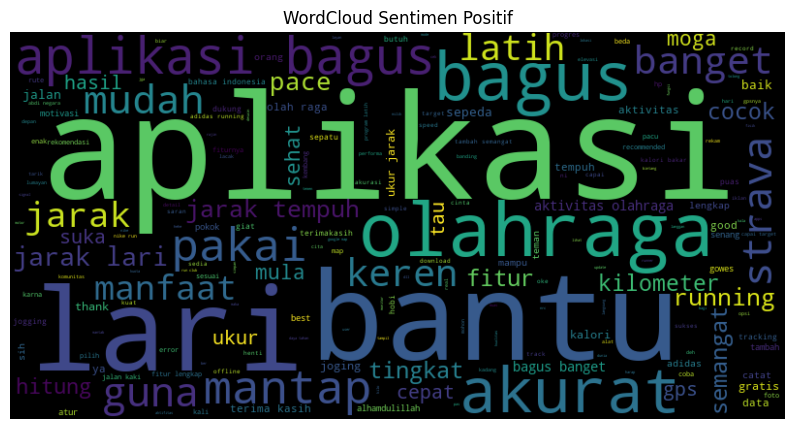

In [11]:
text_positive = ' '.join([' '.join(tokens) for tokens in data[data['Label'] == 2]['stemmed_data']])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_positive)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')
plt.show()

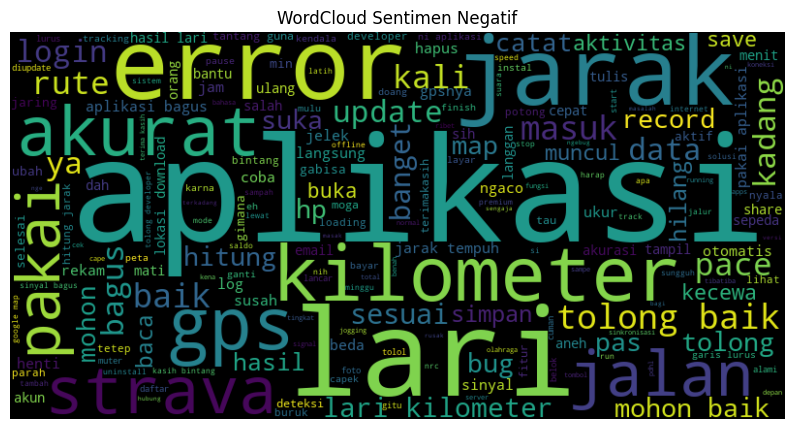

In [12]:
text_negative = ' '.join([' '.join(tokens) for tokens in data[data['Label'] == 0]['stemmed_data']])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_negative)

# Menampilkan WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.show()

#### Data Splitting

In [3]:
data = pd.read_excel('data_cleaning.xlsx')
X_train, X_test, y_train, y_test = train_test_split(data['stemmed_data'], data['Label'], test_size = 0.20, random_state = 0)

#### Pembobotan

In [4]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(766,)
(766,)
(192,)
(192,)


In [6]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [7]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

##### Bangun Model Naive Bayes

In [8]:
nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [9]:
y_pred = nb.predict(tfidf_test)

#### Evaluasi Model

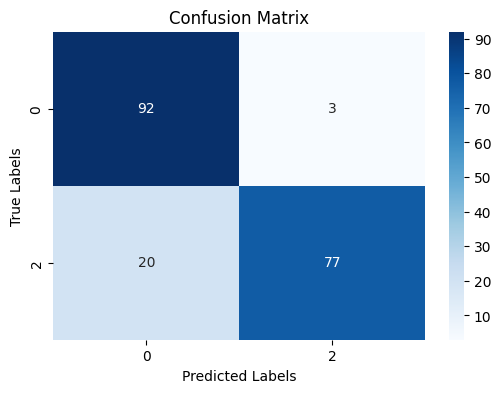

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28028\1877111855.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


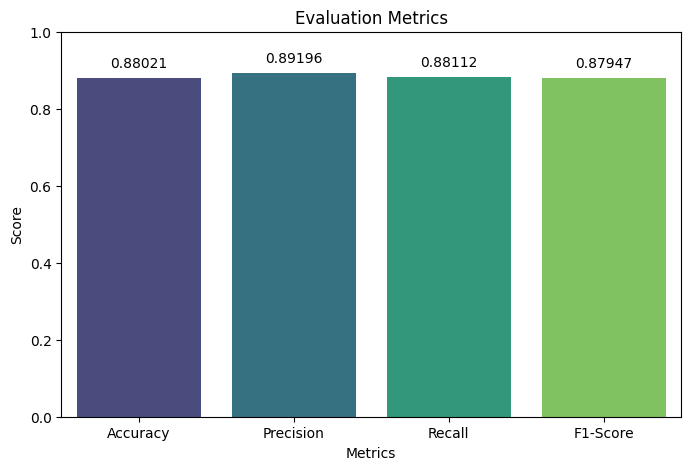

In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Evaluasi metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

# Metrik Evaluasi
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot Metrik Evaluasi
plt.figure(figsize=(8, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("Evaluation Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.xlabel("Metrics")

# Menambahkan nilai pada setiap batang
for i, value in enumerate(metrics.values()):
    plt.text(i, value + 0.02, f"{value:.5f}", ha='center', va='bottom')

plt.show()

##### Uji Model

In [11]:
# Coba Model dengan data baru
new_data = ["Aplikasinya sangat bagus, sangat recommended byk orang"]
new_data = vectorizer.transform(new_data)

y_pred_new = nb.predict(new_data)

print("Sentimen: ", y_pred_new)

Sentimen:  [2]


##### Prediksi Sentimen Data Baru

###### Nike

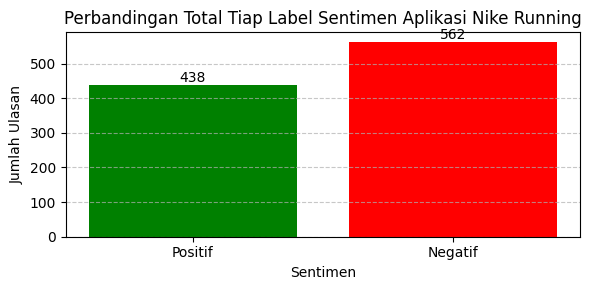

In [23]:
file_path = 'data_clean_nike.xlsx'
data_new = pd.read_excel(file_path)

data_new['processed_data'] = data_new['stemmed_data'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else '')

# Transformasikan data baru menggunakan TF-IDF Vectorizer yang sama
new_data_vectorized = vectorizer.transform(data_new['processed_data'])

# Prediksi sentimen menggunakan model Naive Bayes
data_new['predicted_sentiment'] = nb.predict(new_data_vectorized)

# Hitung jumlah ulasan positif (2) dan negatif (0)
positive_count = (data_new['predicted_sentiment'] == 2).sum()
negative_count = (data_new['predicted_sentiment'] == 0).sum()

# Tampilkan dalam bentuk Plot
plt.figure(figsize=(6, 3))
bars = plt.bar(['Positif', 'Negatif'], [positive_count, negative_count], color=['green', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.title('Perbandingan Total Tiap Label Sentimen Aplikasi Nike Running')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

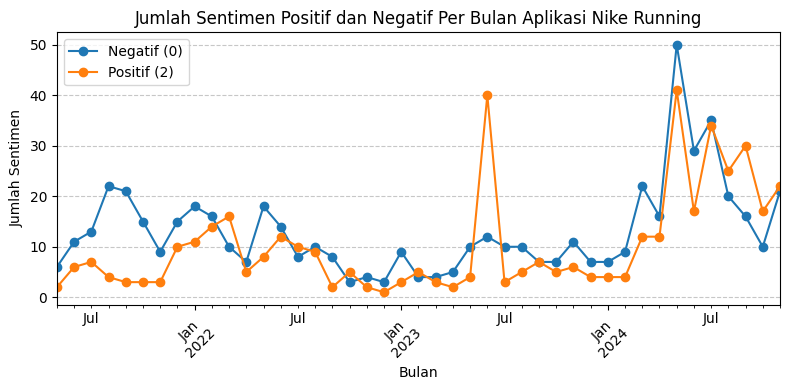

In [25]:
# Pastikan kolom 'at' adalah datetime
data_new['at'] = pd.to_datetime(data_new['at'])

# Tambahkan kolom 'bulan' untuk pengelompokan
data_new['bulan'] = data_new['at'].dt.to_period('M')

# Hitung jumlah sentimen positif dan negatif per bulan
sentimen_bulanan = data_new.groupby(['bulan', 'predicted_sentiment']).size().unstack(fill_value=0)

# Plotting data
plt.figure(figsize=(8, 4))
sentimen_bulanan.plot(kind='line', marker='o', figsize=(8, 4))

# Label dan Judul
plt.title('Jumlah Sentimen Positif dan Negatif Per Bulan Aplikasi Nike Running', fontsize=12)
plt.xlabel('Bulan', fontsize=10)
plt.ylabel('Jumlah Sentimen', fontsize=10)
plt.xticks(rotation=45)
plt.legend(['Negatif (0)', 'Positif (2)'], loc='upper left')

# Tampilkan plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###### Adidas

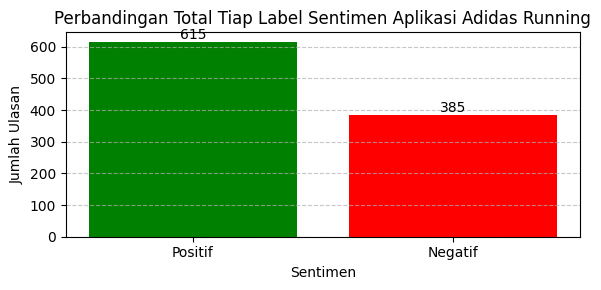

In [26]:
file_path = 'data_clean_adidas.xlsx'
data_new = pd.read_excel(file_path)

data_new['processed_data'] = data_new['stemmed_data'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else '')

# Transformasikan data baru menggunakan TF-IDF Vectorizer yang sama
new_data_vectorized = vectorizer.transform(data_new['processed_data'])

# Prediksi sentimen menggunakan model Naive Bayes
data_new['predicted_sentiment'] = nb.predict(new_data_vectorized)

# Hitung jumlah ulasan positif (2) dan negatif (0)
positive_count = (data_new['predicted_sentiment'] == 2).sum()
negative_count = (data_new['predicted_sentiment'] == 0).sum()

# Tampilkan dalam bentuk Plot
plt.figure(figsize=(6, 3))
bars = plt.bar(['Positif', 'Negatif'], [positive_count, negative_count], color=['green', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.title('Perbandingan Total Tiap Label Sentimen Aplikasi Adidas Running')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

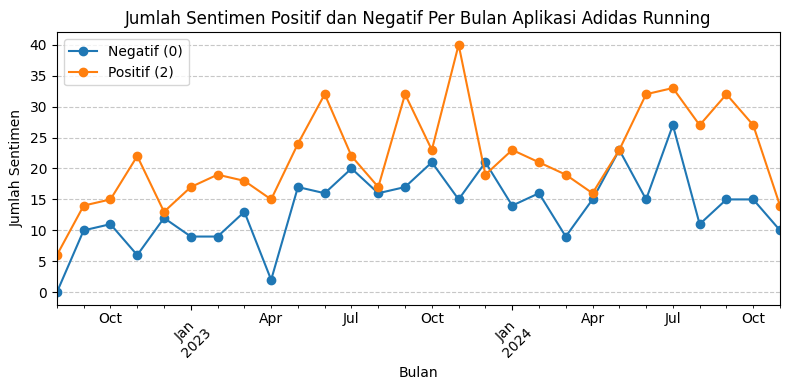

In [27]:
# Pastikan kolom 'at' adalah datetime
data_new['at'] = pd.to_datetime(data_new['at'])

# Tambahkan kolom 'bulan' untuk pengelompokan
data_new['bulan'] = data_new['at'].dt.to_period('M')

# Hitung jumlah sentimen positif dan negatif per bulan
sentimen_bulanan = data_new.groupby(['bulan', 'predicted_sentiment']).size().unstack(fill_value=0)

# Plotting data
plt.figure(figsize=(8, 4))
sentimen_bulanan.plot(kind='line', marker='o', figsize=(8, 4))

# Label dan Judul
plt.title('Jumlah Sentimen Positif dan Negatif Per Bulan Aplikasi Adidas Running', fontsize=12)
plt.xlabel('Bulan', fontsize=10)
plt.ylabel('Jumlah Sentimen', fontsize=10)
plt.xticks(rotation=45)
plt.legend(['Negatif (0)', 'Positif (2)'], loc='upper left')

# Tampilkan plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###### Strava

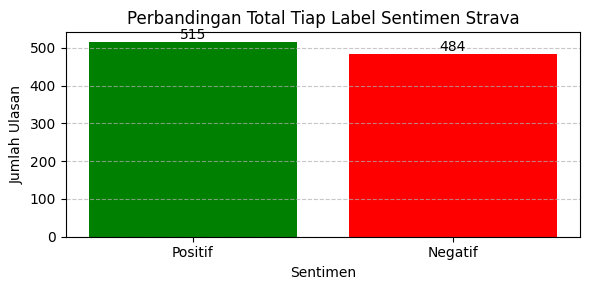

In [28]:
file_path = 'data_clean_strava.xlsx'
data_new = pd.read_excel(file_path)

data_new['processed_data'] = data_new['stemmed_data'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else '')

# Transformasikan data baru menggunakan TF-IDF Vectorizer yang sama
new_data_vectorized = vectorizer.transform(data_new['processed_data'])

# Prediksi sentimen menggunakan model Naive Bayes
data_new['predicted_sentiment'] = nb.predict(new_data_vectorized)

# Hitung jumlah ulasan positif (2) dan negatif (0)
positive_count = (data_new['predicted_sentiment'] == 2).sum()
negative_count = (data_new['predicted_sentiment'] == 0).sum()

# Tampilkan dalam bentuk Plot
plt.figure(figsize=(6, 3))
bars = plt.bar(['Positif', 'Negatif'], [positive_count, negative_count], color=['green', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.title('Perbandingan Total Tiap Label Sentimen Strava')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

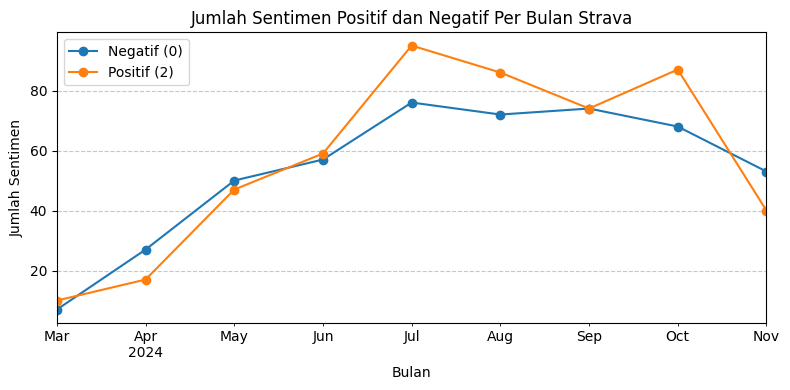

In [29]:
# Pastikan kolom 'at' adalah datetime
data_new['at'] = pd.to_datetime(data_new['at'])

# Tambahkan kolom 'bulan' untuk pengelompokan
data_new['bulan'] = data_new['at'].dt.to_period('M')

# Hitung jumlah sentimen positif dan negatif per bulan
sentimen_bulanan = data_new.groupby(['bulan', 'predicted_sentiment']).size().unstack(fill_value=0)

# Plotting data
plt.figure(figsize=(8, 4))
sentimen_bulanan.plot(kind='line', marker='o', figsize=(8, 4))

# Label dan Judul
plt.title('Jumlah Sentimen Positif dan Negatif Per Bulan Strava', fontsize=12)
plt.xlabel('Bulan', fontsize=10)
plt.ylabel('Jumlah Sentimen', fontsize=10)
plt.xticks(rotation=45)
plt.legend(['Negatif (0)', 'Positif (2)'], loc='upper left')

# Tampilkan plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()